# Color palette with python

##### Germain Salvato Vallverdu [germain.vallverdu@univ-pau.fr](germain.vallverdu@univ-pau.fr)

This notebook aims to present several ways to manage color palette with python, mainly for plot purpose.

## Import some packages

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import HTML # intégration notebook
%matplotlib inline

## Functions

Define convenient functions to plot a matplotlib colormap or a list of colors with matplotlib.

[See this gist](https://gist.github.com/gVallverdu/ac3efecfc640cc9e107f1f7cbfb11bb4)

In [2]:
def plot_cmap(cmap, ncolor=6):
    """ 
    A convenient function to plot colors of a matplotlib cmap
    
    Args:
        ncolor (int): number of color to show
        cmap: a cmap object or a matplotlib color name
    """
    
    if isinstance(cmap, str):
        try:
            cm = plt.get_cmap(cmap)
        except ValueError:
            print("WARNINGS :", cmap, " is not a known colormap")
            cm = plt.cm.gray
    else:
        cm = cmap
            
    with plt.rc_context(plt.rcParamsDefault):
        fig = plt.figure(figsize=(6, 1), frameon=False)
        ax = fig.add_subplot(111)
        ax.pcolor(np.linspace(1, ncolor, ncolor).reshape(1, ncolor), cmap=cm)
        ax.set_title(cm.name)
        xt = ax.set_xticks([])
        yt = ax.set_yticks([])
    return fig

In [3]:
def show_colors(colors):
    """
    Draw a square for each color contained in the colors list
    given in argument.
    """
    with plt.rc_context(plt.rcParamsDefault):
        fig = plt.figure(figsize=(6, 1), frameon=False)
        ax = fig.add_subplot(111)
        for x, color in enumerate(colors):
            ax.add_patch(
                mpl.patches.Rectangle(
                    (x, 0), 1, 1, facecolor=color
                )
            )
        ax.set_xlim((0, len(colors)))
        ax.set_ylim((0, 1))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect("equal")
    
    return fig

## Color models

### How to define a color ?

* RGB : Red Green Blue, additive color model
* HSL : Hue Saturation Light
* CMYK- : Cyan Magenta Yellow Black, soustractive color model

## RGB

### Red Green Blue

* an additive color model
* set "the amount" of a each based color
* each color is defined by un nombre between 0 and 255 (8 bits = 1 octet)

![additive](img/additive.png)

* red (255, 0, 0)
* green (0, 255, 0)
* blue (0, 0, 255)

### HTML color codes

HTML color codes are another way to define a RGB color using an hexadecimal numeral system.

* HTML color starts with a # character
* the folowing 6 characters defines the intensity of red, green and blue colors
* each pair correspond to a number in hexadecimal numeral system from 0 to FF (255)

example : `#2D85C9` <-> (48, 133, 201)

* 2D -> 48
* 85 -> 133
* C9 -> 201

### RGB and RGBA

* extension of RGB model
* a for `alpha` (canal alpha)
* RGBA = RGB + opacity
* opicty is defined between 0 (transparent) and 1 (opaque)

![rgba](img/rgba.png)

## HSL

### Hue, staturation, light

* Closer to the human perception of the color than RGB model
* Hue is define on a wheel from an angle between 0 and 360°
* Saturation and light are defined between 0 et 100%

![](img/tsl.png)

## CYMK

### Cyan Yellow Magenta Black

* Based on a substractive color model
* Used by printers

![synthèse soustractive](img/soustractive.png)

## Several kinds of palette

* qualitative palettes
* sequential palettes
* divergentes palettes

## Qualitatives palettes

* Used to distinguish several groups of data without order or relationship

### Example

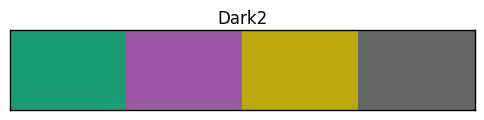

In [4]:
plot_cmap("Dark2", 4)

In [5]:
plot_cmap("Dark2", 4).savefig("img/qualitative.png", bbox_inches="tight")

## Sequential palettes

* Color scale 
* Use it if there is an order between the data

### Example

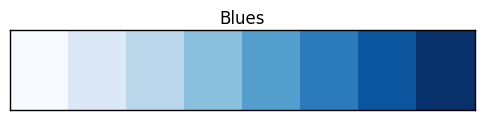

In [6]:
plot_cmap("Blues", 8)

In [7]:
plot_cmap("Blues", 8).savefig("img/sequentielle.png", bbox_inches="tight")

### Reverse order

In matplotlib all palettes suffixed by `_r` are reversed.

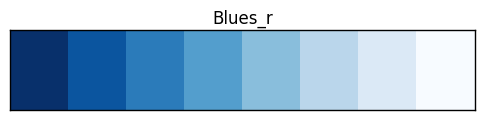

In [8]:
plot_cmap("Blues_r", 8)

In [9]:
plot_cmap("Blues_r", 8).savefig("img/sequentielle_r.png", bbox_inches="tight")

## Divergent palettes

* Usefull if there is a central value which play a specific role
* values disposed around zero

### Example

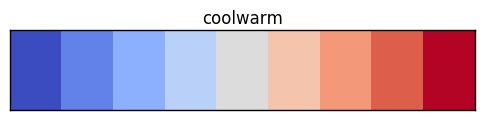

In [10]:
plot_cmap("coolwarm", 9)

In [11]:
plot_cmap("coolwarm", 9).savefig("img/divergente.png", bbox_inches="tight")

## Build a custum color palette

### some tools

* [matplotlib colormaps](http://matplotlib.org/users/colormaps.html)
* [seaborn palettes](http://seaborn.pydata.org/tutorial/color_palettes.html)
* [colorlover palettes](https://github.com/jackparmer/colorlover)

## With matplotlib

[matplotlib colormaps](http://matplotlib.org/users/colormaps.html)

* matplotlib *colormaps* are in `matplotlib.cm` module
* `colormap` allows to map values on a color scale

### Example colormap `summer`

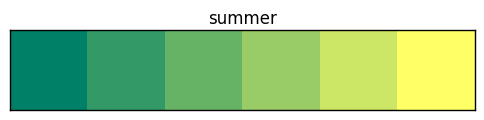

In [12]:
plot_cmap(plt.cm.summer, 6)

In [13]:
plot_cmap(plt.cm.summer, 6).savefig("img/summer.png", bbox_inches="tight")

`colormap` returns a `rgba` color.

In [14]:
plt.cm.summer(X=42)

(0.16470588235294117, 0.58235294117647063, 0.40000000000000002, 1.0)

* X is a float number or a list or an array 
* X must be between 0 and `plt.cm.colormap.N`
* You can define opacity

Max val =  256
[[ 0.00392157  0.50196078  0.4         0.6       ]
 [ 0.19607843  0.59803922  0.4         0.6       ]
 [ 0.39215686  0.69607843  0.4         0.6       ]
 [ 0.78431373  0.89215686  0.4         0.6       ]]


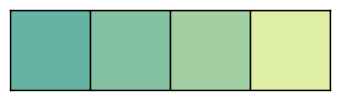

In [15]:
print("Max val = ", plt.cm.summer.N)
palette = plt.cm.summer(X=[1, 50, 100, 200], alpha=.6)
print(palette)
show_colors(palette)

In [16]:
show_colors(palette).savefig("img/mpl_palette1.png")

* You can change interval values using `Normalize`

[[ 0.09803922  0.54901961  0.4         1.        ]
 [ 0.29803922  0.64901961  0.4         1.        ]
 [ 0.50196078  0.75098039  0.4         1.        ]
 [ 0.70196078  0.85098039  0.4         1.        ]
 [ 0.90196078  0.95098039  0.4         1.        ]]


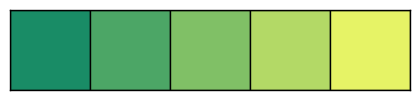

In [17]:
normalize = mpl.colors.Normalize(vmin=-5, vmax=5)
palette = plt.cm.summer(X=normalize([-4, -2, 0, 2, 4]), alpha=1)
print(palette)
show_colors(palette)

In [18]:
show_colors(palette).savefig("img/mpl_palette2.png")

## With colorlover

In [19]:
import colorlover as cl

[Colorlover](https://github.com/jackparmer/colorlover) provides function to set up a color palette

```py
import colorlover as cl
```

* `cl.colorsys` : conversion between color models
* `cl.scales` : color palette
* `cl.to_HTML` : help function to show the palette

`cl.scales` has to be used following :

```py
cl.scales["number"]["type"]["name"]
```

where

* `number` is a number between 3 and 12 included
* `type` is : `div`, `seq` or `qual`
* `name` is the palette name

All palettes are not available for all combinations.

For example, this is divergent palettes with 4 colors. You have to use `cl.to_html` to get an html version and `HTML()` to ask the notebook to display the html code and show the palette.

In [20]:
HTML(cl.to_html(cl.scales["4"]["div"]))

Divergent color palette `PuOr` with 4 colors :

In [21]:
cl.scales["4"]["div"]["PuOr"]

['rgb(230,97,1)', 'rgb(253,184,99)', 'rgb(178,171,210)', 'rgb(94,60,153)']

#### conversion in RGB triplets

In order to use this palette with matplotlib you have to convert it in true RGB triplets.

In [22]:
cl.to_numeric(cl.scales["4"]["div"]["PuOr"])

[(230.0, 97.0, 1.0),
 (253.0, 184.0, 99.0),
 (178.0, 171.0, 210.0),
 (94.0, 60.0, 153.0)]

## With seaborn

In [24]:
import seaborn as sns

The documentation is really clear and provides a nice tutorial [seaborn color palettes](http://seaborn.pydata.org/tutorial/color_palettes.html). The following juste provides simple exampl cases.

```py
import seaborn as sns
```

seaborn provides several functions in order to build and show color palettes. For example, in order to show the current palette :

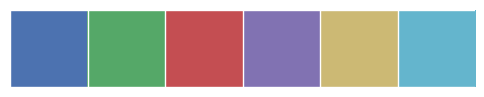

In [29]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

#### A qualitative palette

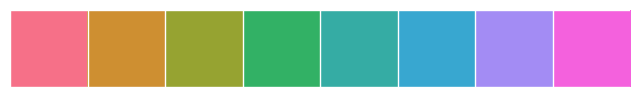

In [26]:
sns.palplot(sns.color_palette("husl", 8))

#### A sequential palette

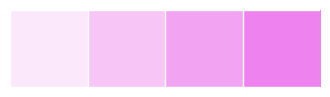

In [27]:
sns.palplot(sns.light_palette("violet", 4))

#### A divergente palette

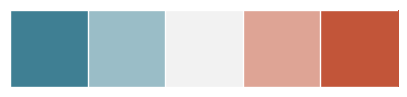

In [28]:
sns.palplot(sns.diverging_palette(220, 20, n=5))

## Enjoy !

Germain